# Plots to explain correlation between elspot price and exog variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('\\Users\\madss\\Aarhus Universitet\\CompTek\\6. Semester\\Bachelor\\github\\FEPCEU')
from data.data_retriever import Dataretreiver

In [3]:
def sigmoid(x, k=1, x_0=0):
    return 1 / (1 + np.exp(-k * (x - x_0)))

In [4]:
data = Dataretreiver()
data.wind_df.head()

c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:163: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').ffill()
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:164: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:209: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' inste

wind_area_1  wind_area_10  wind_area_11  wind_area_12  \
time                                                                         
2024-01-01 00:00:00         2.73          7.12          1.33          1.75   
2024-01-01 01:00:00         4.08          6.46          2.14          1.74   
2024-01-01 02:00:00         5.43          5.79          2.95          1.74   
2024-01-01 03:00:00         6.78          5.13          3.76          1.73   
2024-01-01 04:00:00         5.10          7.00          3.87          1.47   

                     wind_area_13  wind_area_14  wind_area_15  wind_area_16  \
time                                                                          
2024-01-01 00:00:00          1.35          4.91          9.51          0.37   
2024-01-01 01:00:00          2.33          4.53          7.97          0.78   
2024-01-01 02:00:00          3.31          4.15          6.44          1.19   
2024-01-01 03:00:00          4.29          3.77          4.90          1.60   
2024-01-01 04:00:00          4.10          5.15          5.53          2.49   

                     wind_area_17  wind_area_18  ...  wind_area_37  \
time                                             ...                 
2024-01-01 00:00:00          1.64          0.38  ...          0.54   
2024-01-01 01:00:00          1.68          1.16  ...          1.18   
2024-01-01 02:00:00          1.71          1.95  ...          1.82   
2024-01-01 03:00:00          1.75          2.73  ...          2.46   
2024-01-01 04:00:00          1.59          3.21  ...          2.05   

                     wind_area_38  wind_area_39  wind_area_4  wind_area_40  \
time                                                                         
2024-01-01 00:00:00          7.22         12.42          4.0         13.04   
2024-01-01 01:00:00          5.13         11.31          5.4         12.59   
2024-01-01 02:00:00          3.04         10.20          6.8         12.15   
2024-01-01 03:00:00          0.95          9.09          8.2         11.70   
2024-01-01 04:00:00          1.04          8.44          8.7         10.86   

                     wind_area_5  wind_area_6  wind_area_7  wind_area_8  \
time                                                                      
2024-01-01 00:00:00         3.61         2.42         4.73         2.62   
2024-01-01 01:00:00         6.93         3.16         4.02         3.27   
2024-01-01 02:00:00        10.26         3.91         3.31         3.91   
2024-01-01 03:00:00        13.58         4.65         2.60         4.56   
2024-01-01 04:00:00        16.48         4.20         2.04         4.77   

                     wind_area_9  
time                              
2024-01-01 00:00:00         4.81  
2024-01-01 01:00:00         5.25  
2024-01-01 02:00:00         5.69  
2024-01-01 03:00:00         6.13  
2024-01-01 04:00:00         7.21  

[5 rows x 40 columns]

In [5]:
cutoff_day = '2024-11-30'

wind_mean_df = data.wind_df.mean(axis=1, numeric_only=True)
sun_mean_df = data.sun_df.mean(axis=1, numeric_only=True)
temp_mean_df = data.temp_df.mean(axis=1, numeric_only=True)

el_df = data.elspot_df.copy()

el_df = el_df[el_df.index <= cutoff_day]



combined = pd.DataFrame({
    'wind': wind_mean_df, 
    'sun': sun_mean_df,
    'temperature': temp_mean_df,
    'price': el_df['price']
})

#combined['wind_sigmoid'] = sigmoid(combined['wind'], k=0.1, x_0=combined['wind'].mean())

combined = combined[combined.index <= cutoff_day]
combined

wind  sun  temperature       price
2024-01-01 00:00:00   5.41025  0.0       5.1625  126.660004
2024-01-01 01:00:00   5.06225  0.0       5.1450  209.779999
2024-01-01 02:00:00   4.71450  0.0       5.0900  198.740005
2024-01-01 03:00:00   4.36650  0.0       5.0350   30.860001
2024-01-01 04:00:00   4.51550  0.0       4.9775   -0.220000
...                       ...  ...          ...         ...
2024-11-29 20:00:00   9.96275  0.0       6.1075  894.219971
2024-11-29 21:00:00  10.11900  0.0       6.0025  836.049988
2024-11-29 22:00:00  10.40300  0.0       5.9150  848.200012
2024-11-29 23:00:00  10.68425  0.0       5.7975  770.270020
2024-11-30 00:00:00  10.96825  0.0       5.6750  596.570007

[8017 rows x 4 columns]

# Pearson correlation coeficient (PCC)

In [6]:
correlations = combined.corr(method='pearson')
print(correlations['price'])

wind          -0.415432
sun           -0.322854
temperature   -0.103851
price          1.000000
Name: price, dtype: float64


## El-samhandel:

In [7]:
import requests

response = requests.get(
    url='https://api.energidataservice.dk/dataset/ForeignExchange?offset=0&start=2024-01-01T00:00&end=2024-12-31T23:59&filter=%7B%22PriceArea%22:[%22DK1%22]%7D&sort=HourUTC%20DESC')

result = response.json()

for k, v in result.items():
    print(k, v)

el_records = result.get('records', [])

#print('records:')
#for record in el_records:
#    print(' ', record)

total 8784
filters {"PriceArea":["DK1"]}
sort HourUTC DESC
dataset ForeignExchange
records [{'HourUTC': '2024-12-31T22:00:00', 'HourDK': '2024-12-31T23:00:00', 'PriceArea': 'DK1', 'ExchangeImportSE_MWh': 179.463, 'ExchangeExportSE_MWh': 0.0, 'ExchangeImportGE_MWh': 0.0, 'ExchangeExportGE_MWh': -41.26, 'ExchangeImportNL_MWh': 212.877, 'ExchangeExportNL_MWh': 0.0, 'ExchangeImportNO_MWh': 0.0, 'ExchangeExportNO_MWh': -1654.4062, 'ExchangeImportGB_MWh': 0.0, 'ExchangeExportGB_MWh': -93.36891}, {'HourUTC': '2024-12-31T21:00:00', 'HourDK': '2024-12-31T22:00:00', 'PriceArea': 'DK1', 'ExchangeImportSE_MWh': 667.852, 'ExchangeExportSE_MWh': 0.0, 'ExchangeImportGE_MWh': 0.0, 'ExchangeExportGE_MWh': -14.65, 'ExchangeImportNL_MWh': 118.159, 'ExchangeExportNL_MWh': 0.0, 'ExchangeImportNO_MWh': 0.0, 'ExchangeExportNO_MWh': -1512.1558, 'ExchangeImportGB_MWh': 0.0, 'ExchangeExportGB_MWh': -1031.368946}, {'HourUTC': '2024-12-31T20:00:00', 'HourDK': '2024-12-31T21:00:00', 'PriceArea': 'DK1', 'ExchangeIm

## Gaspris

In [10]:
import requests

response = requests.get(
    url='https://api.energidataservice.dk/dataset/GasDailyBalancingPrice?offset=0&start=2024-01-01T00:00&end=2024-12-31T00:00&sort=GasDay%20DESC')

result = response.json()

for k, v in result.items():
    print(k, v)

gas_records = result.get('records', [])

print('records:')
for record in gas_records:
    print(' ', record)

total 365
sort GasDay DESC
dataset GasDailyBalancingPrice
records [{'GasDay': '2024-12-30T00:00:00', 'EEXSpotIndexEUR_MWh': 49.856999, 'EEXWithinDayEUR_MWh': 48.954, 'ExchangeRateEUR_DKK': 746.0, 'SalesPriceDKK_kWh': 0.367, 'PurchasePriceDKK_kWh': 0.3634, 'NeutralGasPriceDKK_kWh': 0.3652, 'EEXHighestPricePurchaseDKK_kWh': None, 'EEXLowestPriceSaleDKK_kWh': None, 'MarginalSalePriceDKK_kWh': 0.367, 'MarginalPurchasePriceDKK_kWh': 0.3634, 'THEPriceDKK_kWh': 0.3613}, {'GasDay': '2024-12-29T00:00:00', 'EEXSpotIndexEUR_MWh': 49.908, 'EEXWithinDayEUR_MWh': 52.512999, 'ExchangeRateEUR_DKK': 746.019999, 'SalesPriceDKK_kWh': 0.3938, 'PurchasePriceDKK_kWh': 0.3898, 'NeutralGasPriceDKK_kWh': 0.3918, 'EEXHighestPricePurchaseDKK_kWh': None, 'EEXLowestPriceSaleDKK_kWh': None, 'MarginalSalePriceDKK_kWh': 0.3938, 'MarginalPurchasePriceDKK_kWh': 0.3898, 'THEPriceDKK_kWh': 0.3613}, {'GasDay': '2024-12-28T00:00:00', 'EEXSpotIndexEUR_MWh': 49.908, 'EEXWithinDayEUR_MWh': 51.587, 'ExchangeRateEUR_DKK': 746.0

<Axes: xlabel='GasDay'>

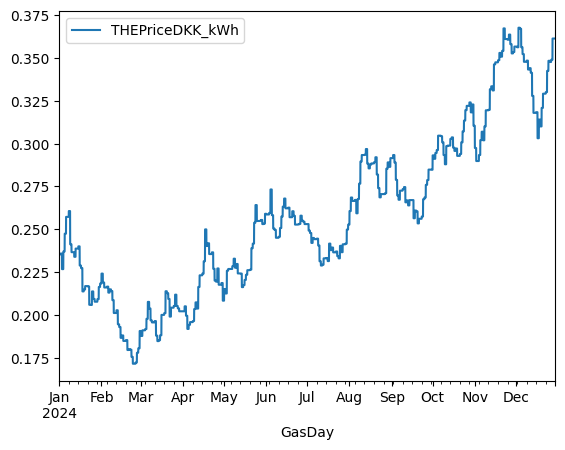

In [19]:
import pandas as pd

# Assuming 'records' is a list of dictionaries defined earlier
gas_df = pd.DataFrame(gas_records)

# Convert datetime strings to datetime objects
# gas_df['HourUTC'] = pd.to_datetime(gas_df['HourUTC'])
gas_df['GasDay'] = pd.to_datetime(gas_df['GasDay'])

# Set HourDK as the index
gas_df.set_index('GasDay', inplace=True)

# Drop HourUTC column
# gas_df.drop(columns='HourUTC', inplace=True)
#gas_df.drop(columns='GasDay', inplace=True)

# Keep only the 'THEPriceDKK_kWh' column
gas_df = gas_df[['THEPriceDKK_kWh']]
gas_df = gas_df.resample('h').ffill()

gas_df.plot()

In [20]:
import pandas as pd

# Assuming 'records' is a list of dictionaries defined earlier
el_df = pd.DataFrame(el_records)

# Convert datetime strings to datetime objects
el_df['HourUTC'] = pd.to_datetime(el_df['HourUTC'])
el_df['HourDK'] = pd.to_datetime(el_df['HourDK'])

# Drop HourUTC column
el_df.drop(columns='HourUTC', inplace=True)
el_df.drop(columns='PriceArea', inplace=True)

# Set HourDK as the index
el_df.set_index('HourDK', inplace=True)

# Assuming df2 is already defined and indexed by HourDK
# Example: df2 = pd.read_csv(...); df2['HourDK'] = pd.to_datetime(df2['HourDK']); df2.set_index('HourDK', inplace=True)

# Merge (join) df with df2 on HourDK index
combined_df = el_df.join(combined, how='inner')  # Change 'inner' to 'outer' if needed
combined_df = combined_df.join(gas_df, how='inner')

export_cols = [col for col in combined_df.columns if 'Export' in col]

# Flip sign to make exports positive
for col in export_cols:
    combined_df[col] = -combined_df[col]

# Display the combined DataFrame
combined_df.rename(columns={
    'ExchangeImportSE_MWh'  : 'Sweden Import (MWh)',
    'ExchangeExportSE_MWh'  : 'Sweden Export (MWh)',
    'ExchangeImportGB_MWh'  : 'Great Britain Import (MWh)',
    'ExchangeExportGB_MWh'  : 'Great Britain Export (MWh)',
    'ExchangeImportGE_MWh'  : 'Germany Import (MWh)',
    'ExchangeExportGE_MWh'  : 'Germany Export (MWh)',
    'ExchangeImportNO_MWh'  : 'Norway Import (MWh)',
    'ExchangeExportNO_MWh'  : 'Norway Export (MWh)',
    'ExchangeImportNL_MWh'  : 'Netherlands Import (MWh)',
    'ExchangeExportNL_MWh'  : 'Netherlands Export (MWh)',
    'sun'                   : 'Minutes of sun pr. hour (min)',
    'wind'                  : 'Mean wind speed pr. hour (m/s)',
    'temperature'           : 'Mean temperature pr. hour (°C)',
    'THEPriceDKK_kWh'       : 'Daily Gas price (DKK/kWh)',
    
}, 
inplace=True)
combined_df


Sweden Import (MWh)  Sweden Export (MWh)  \
HourDK                                                          
2024-11-30 00:00:00              717.924               -0.000   
2024-11-29 23:00:00              717.733               -0.000   
2024-11-29 22:00:00              717.704               -0.000   
2024-11-29 21:00:00              717.441               -0.000   
2024-11-29 20:00:00              716.248               -0.000   
...                                  ...                  ...   
2024-01-01 04:00:00                0.000              308.110   
2024-01-01 03:00:00                0.000              457.779   
2024-01-01 02:00:00                0.000              212.474   
2024-01-01 01:00:00                0.000              495.866   
2024-01-01 00:00:00                0.000              485.098   

                     Germany Import (MWh)  Germany Export (MWh)  \
HourDK                                                            
2024-11-30 00:00:00                  0.00               1813.24   
2024-11-29 23:00:00                  0.00               1969.22   
2024-11-29 22:00:00                  0.00               1952.48   
2024-11-29 21:00:00                  0.00               1792.51   
2024-11-29 20:00:00                  0.00               2355.18   
...                                   ...                   ...   
2024-01-01 04:00:00               2441.79                 -0.00   
2024-01-01 03:00:00               2518.08                 -0.00   
2024-01-01 02:00:00               2429.78                 -0.00   
2024-01-01 01:00:00               2532.59                 -0.00   
2024-01-01 00:00:00               2581.48                 -0.00   

                     Netherlands Import (MWh)  Netherlands Export (MWh)  \
HourDK                                                                    
2024-11-30 00:00:00                     0.000                   680.698   
2024-11-29 23:00:00                     0.000                   701.635   
2024-11-29 22:00:00                     0.000                   691.898   
2024-11-29 21:00:00                     0.000                   233.196   
2024-11-29 20:00:00                   437.930                    -0.000   
...                                       ...                       ...   
2024-01-01 04:00:00                   287.384                    -0.000   
2024-01-01 03:00:00                   643.678                    -0.000   
2024-01-01 02:00:00                   588.684                    -0.000   
2024-01-01 01:00:00                   677.961                    -0.000   
2024-01-01 00:00:00                   522.748                    -0.000   

                     Norway Import (MWh)  Norway Export (MWh)  \
HourDK                                                          
2024-11-30 00:00:00            1622.2925              -0.0000   
2024-11-29 23:00:00            1622.0936              -0.0000   
2024-11-29 22:00:00            1615.7512              -0.0000   
2024-11-29 21:00:00            1519.1728              -0.0000   
2024-11-29 20:00:00            1407.3712              -0.0000   
...                                  ...                  ...   
2024-01-01 04:00:00               0.0000            1387.5465   
2024-01-01 03:00:00               0.0000            1700.9441   
2024-01-01 02:00:00               0.0000            1700.7372   
2024-01-01 01:00:00               0.0000            1701.0243   
2024-01-01 00:00:00               0.0000            1700.6408   

                     Great Britain Import (MWh)  Great Britain Export (MWh)  \
HourDK                                                                        
2024-11-30 00:00:00                    0.000000                  997.953541   
2024-11-29 23:00:00                    0.000000                  996.090396   
2024-11-29 22:00:00                    0.000000                  997.048734   
2024-11-29 21:00:00                    0.000000                  997.643808   
2024-11

['#002546', '#002546', '#002546']


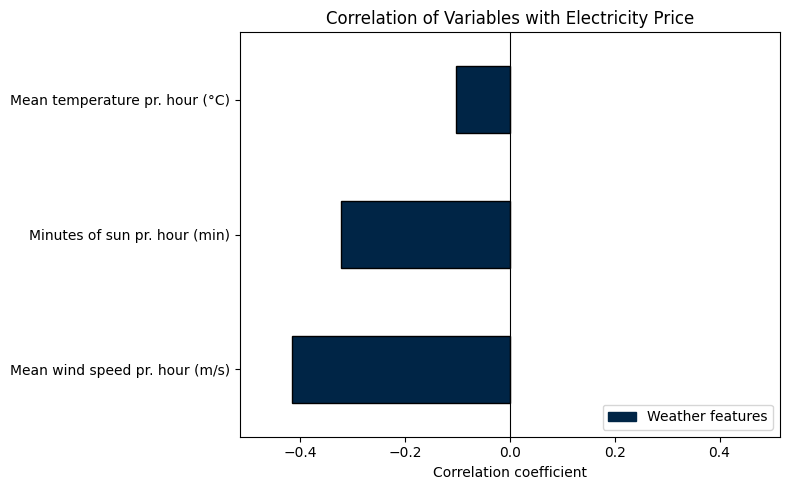

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# List of columns to check correlation with price
cols = [
    # 'Sweden Import (MWh)', 'Sweden Export (MWh)',
    # 'Germany Import (MWh)', 'Germany Export (MWh)',
    # 'Netherlands Import (MWh)', 'Netherlands Export (MWh)',
    # 'Norway Import (MWh)', 'Norway Export (MWh)',
    # 'Great Britain Import (MWh)', 'Great Britain Export (MWh)',
    'Mean wind speed pr. hour (m/s)', 
    'Minutes of sun pr. hour (min)', 
    'Mean temperature pr. hour (°C)',
    # 'Daily Gas price (DKK/kWh)',
    'price'
]

# Ensure these columns exist in combined_df
existing_cols = [c for c in cols if c in combined_df.columns]

# Compute correlation matrix for those columns
corr_matrix = combined_df[existing_cols].corr()

# Extract correlations with 'price', drop self-correlation
correlations = corr_matrix['price'].drop('price')

# Determine symmetric x-axis limits
max_corr = max(abs(correlations.min()), abs(correlations.max()))
xlim = (-(max_corr + 0.1), max_corr + 0.1)

# === HIGHLIGHT one specific bar ===
temp_column = 'Mean temperature pr. hour (°C)'  # change this as needed
sun_column = 'Minutes of sun pr. hour (min)'
wind_column = 'Mean wind speed pr. hour (m/s)'
gas_column = 'Daily Gas price (DKK/kWh)'
default_color = 'orange'
weather_color = '#002546'
gas_color = 'green'

# Sort correlations for consistent plotting order
sorted_corr = correlations.sort_values()
colors = []

for col in sorted_corr.index:
    if col in [temp_column, sun_column, wind_column]:
        colors.append(weather_color)
    elif col in [gas_column]:
        colors.append(gas_color)
    else:
        colors.append(default_color)

print(colors)

# Plot
plt.figure(figsize=(8, 5))
sorted_corr.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Correlation of Variables with Electricity Price')
plt.xlabel('Correlation coefficient')
plt.xlim(xlim)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
# Create custom legend handles
orange_patch = mpatches.Patch(color=weather_color, label='Weather features')
# blue_patch = mpatches.Patch(color=default_color, label='Foreign exchange features')
# green_patch = mpatches.Patch(color=gas_color, label='Gas price feature')

# Add legend to plot
plt.legend(handles=[
    orange_patch, 
    # blue_patch, 
    # green_patch
    ], loc='lower right')

# Save plot
plt.savefig('../plots/correlation_with_price.svg', format='svg')

plt.show()


# Granger causality test

# Correlation plots

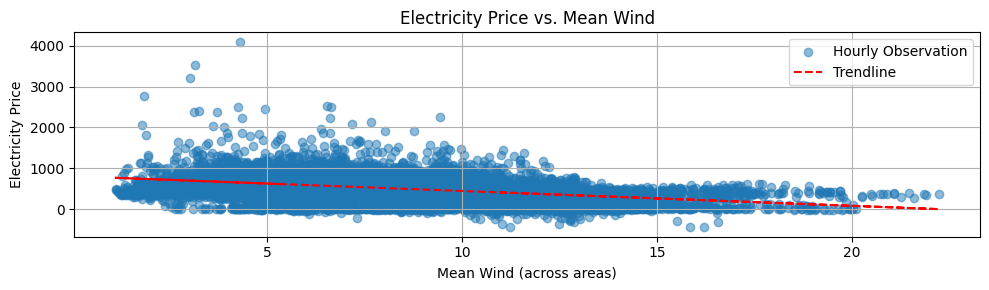

In [115]:
import matplotlib.pyplot as plt

# Fit a linear trendline
z = np.polyfit(combined['wind'], combined['price'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10,3))
plt.scatter(combined['wind'], combined['price'], alpha=0.5, label='Hourly Observation')
plt.plot(combined['wind'], p(combined['wind']), 'r--', label='Trendline')
plt.title('Electricity Price vs. Mean Wind')
plt.xlabel('Mean Wind (across areas)')
plt.ylabel('Electricity Price')
plt.grid(True)
plt.tight_layout()

plt.savefig('../plots/elspot_vs_mean_wind.pdf', format='pdf')
plt.legend()
plt.show()

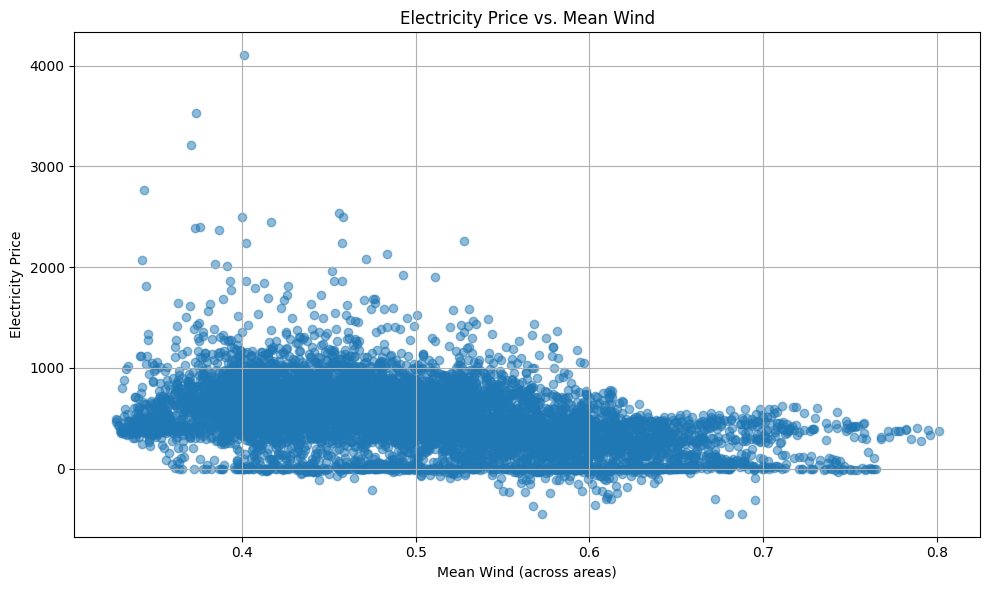

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(combined['wind_sigmoid'], combined['price'], alpha=0.5)
plt.title('Electricity Price vs. Mean Wind')
plt.xlabel('Mean Wind (across areas)')
plt.ylabel('Electricity Price')
plt.grid(True)
plt.tight_layout()
plt.show()